# Load Libraries and Data

In [79]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
df = pd.read_csv('data/kc_house_data.csv')

# check the columns and first few rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Explore the Data

In [80]:
# get the total counts and data types for each column
print(df.shape)
print("\n")
df.info()

(21597, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float

In [81]:
# Get descriptions of each column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [82]:
# look for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicates: ", len(duplicate_rows_df))

Number of duplicates:  0


In [83]:
# preview 5 most frequent values of a col in a loop, for each string col.
# looking for extraneous values and getting to know the data
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [84]:
# replace extraneous value '?' in 'sqft_basement' col to equal 0 as that is mode
# convert to type to float
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [85]:
# see results
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [86]:
# check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Scrub the Data

In [87]:
# analyze waterfront column
print(df['waterfront'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [88]:
# values are either yes (1.0) or no (0.0)
# mean, median, or mode would not be ideal measurements here
# it is best to drop the rows
df = df[df['waterfront'].notna()]
print(df.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [89]:
# how much is missing from year renovated - 18%
# printed most common values so that we know what to replace the nulls with
print('Percentage of Null yr_renovated Values:', len(df[df.yr_renovated.isna()])/ len(df))
print('Number of Unique yr_renovated Values:', df.yr_renovated.nunique())
print('Number of Unique Values:', df.yr_renovated.value_counts())

Percentage of Null yr_renovated Values: 0.17751417720201862
Number of Unique yr_renovated Values: 70
Number of Unique Values: 0.0       15157
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [90]:
# 0.0 is the mode
# a number equals the year the home was renovated and 0.0 means the home was never renovated
# we should then also assume that the blank cells mean that these homes were never renovated
# convert nan to 0.0
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0.0

In [91]:
# see results
df.yr_renovated.value_counts()

0.0       18569
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [92]:
# analyze view column
print(df['view'].value_counts())

0.0    17312
2.0      836
3.0      435
1.0      291
4.0      290
Name: view, dtype: int64


In [93]:
views_mean = df['view'].mean()
views_median = df['view'].median()
views_mode = df['view'].mode()
print('Viewed Mean: ', views_mean)
print('Viewed Median: ', views_median)
print('Viewed Mode: ', views_mode)

Viewed Mean:  0.23105823418910457
Viewed Median:  0.0
Viewed Mode:  0    0.0
dtype: float64


In [94]:
# both the median and mode are 0.0
# the mean rounded to the nearest whole number is also 0.0
# it is best to assume the cells were left blank because they were not viewed
# the blank num_views cells should be changed to 0.0
df['view'] = df['view'].fillna(0.0)
print(df['view'].value_counts())

0.0    17369
2.0      836
3.0      435
1.0      291
4.0      290
Name: view, dtype: int64


In [95]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [96]:
# see if all null values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19221 non-null  int64  
 1   date           19221 non-null  object 
 2   price          19221 non-null  float64
 3   bedrooms       19221 non-null  int64  
 4   bathrooms      19221 non-null  float64
 5   sqft_living    19221 non-null  int64  
 6   sqft_lot       19221 non-null  int64  
 7   floors         19221 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           19221 non-null  float64
 10  condition      19221 non-null  int64  
 11  grade          19221 non-null  int64  
 12  sqft_above     19221 non-null  int64  
 13  sqft_basement  19221 non-null  float64
 14  yr_built       19221 non-null  int64  
 15  yr_renovated   19221 non-null  float64
 16  zipcode        19221 non-null  int64  
 17  lat            19221 non-null  float64
 18  long  

In [97]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

# EDA with Visualizations

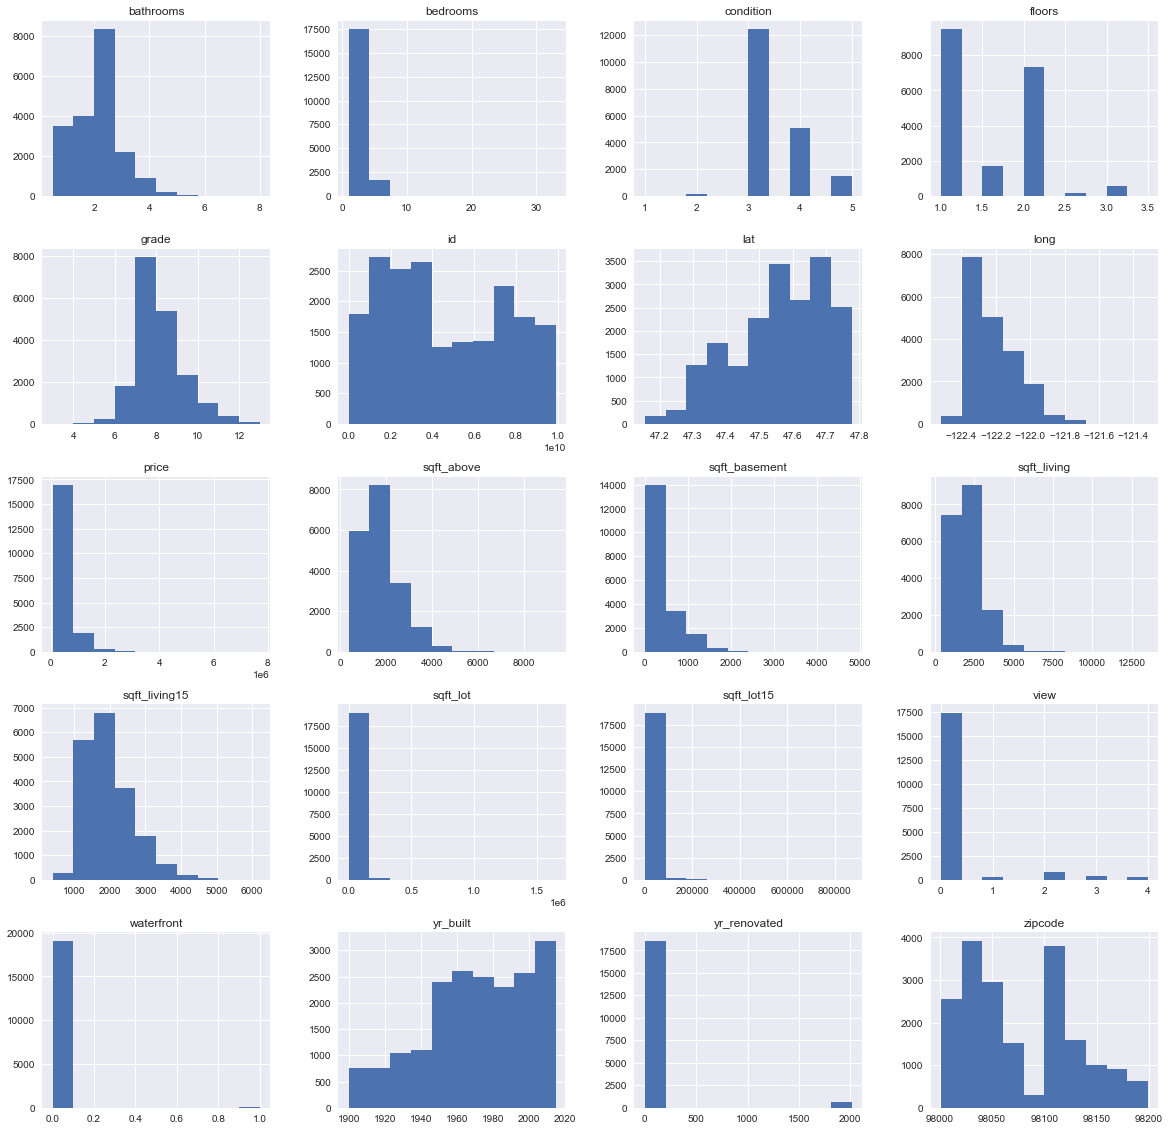

In [98]:
df.hist(figsize=(20,20));

In [99]:
# zipcode will be dropped
# lat and long will not be used
# grade and condition are categorical
# all others are continuous

## Dependant Variable - Price

In [100]:
# our independant variable will be price
# the first thing we need to do is get rid of the ouliers
# import libraries to get statistics
from numpy import mean
from numpy import std

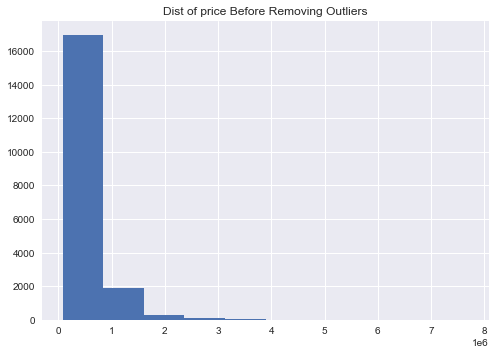

In [101]:
plt.title('Dist of price Before Removing Outliers')
df['price'].hist();

In [104]:
price_cutoff = df['price'].quantile(.925)
price_cutoff

975000.0

In [106]:
# identify outliers
df[df['price']>price_cutoff]['price'].describe()

count    1.440000e+03
mean     1.498444e+06
std      6.370019e+05
min      9.760000e+05
25%      1.100000e+06
50%      1.300000e+06
75%      1.650000e+06
max      7.700000e+06
Name: price, dtype: float64

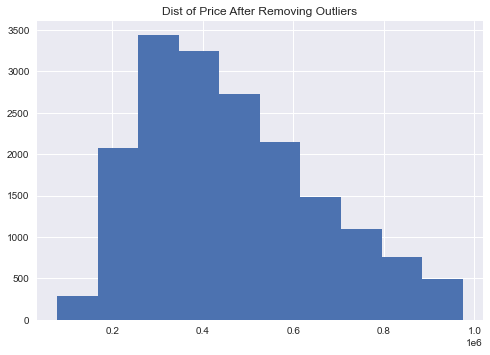

In [107]:
plt.title('Dist of Price After Removing Outliers')
df[df['price']<price_cutoff]['price'].hist();

## Housing Aspects

### Grade

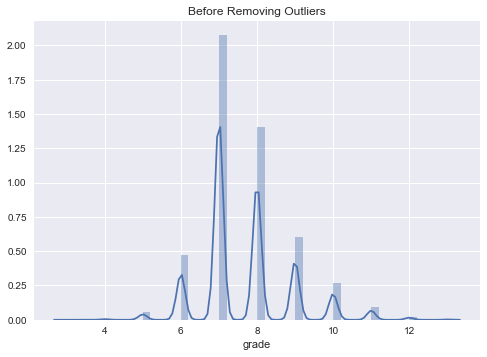

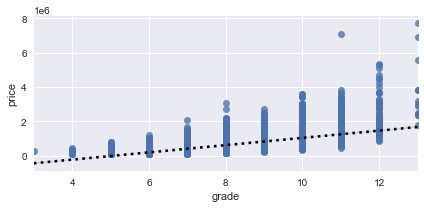

In [108]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['grade'])
plt.show();
sns.lmplot(x = 'grade', y = 'price', data=df,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Condition

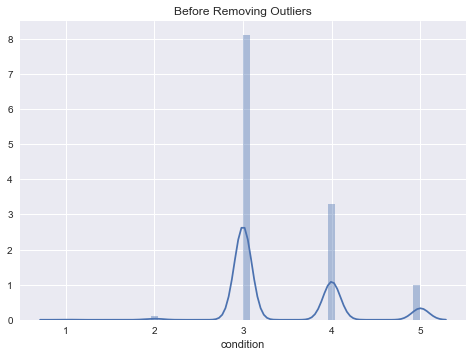

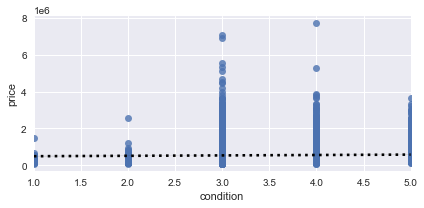

In [109]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['condition'])
plt.show();
sns.lmplot(x = 'condition', y = 'price', data=df,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Number of Bathrooms

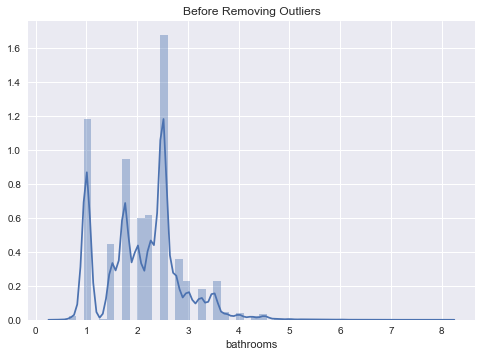

In [110]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [111]:
# data appears to be skewed right
# cutoff should be at 99th percentile
bath_cutoff = df['bathrooms'].quantile(.99)
bath_cutoff

4.25

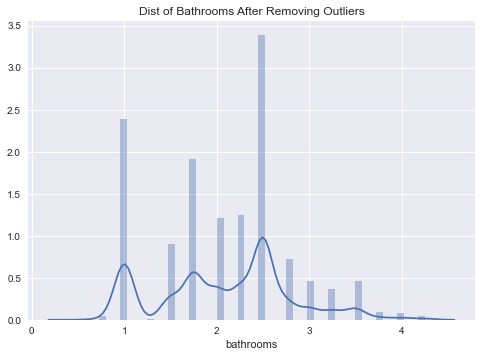

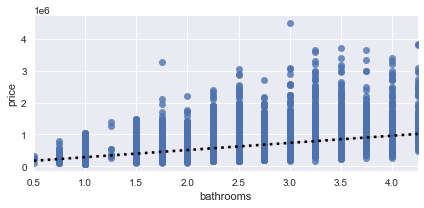

In [112]:
bath_outs = df[df['bathrooms']<=bath_cutoff]
plt.title('Dist of Bathrooms After Removing Outliers')
sns.distplot(bath_outs['bathrooms'])
plt.show();
sns.lmplot(x = 'bathrooms', y = 'price', data=bath_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Number of Bedrooms

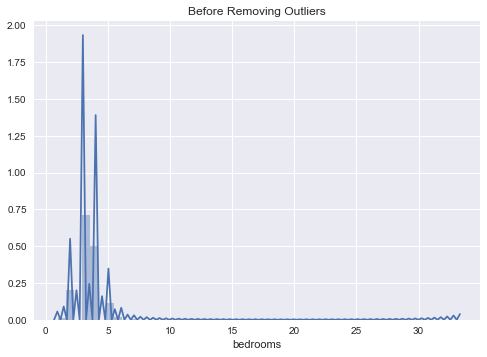

In [113]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

In [114]:
df['bedrooms'].describe()

count    19221.000000
mean         3.374642
std          0.928539
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

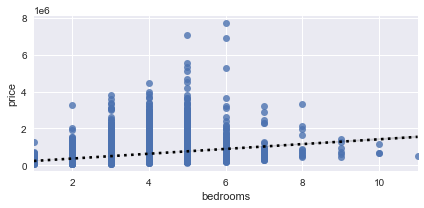

In [115]:
# 33 is an oulier and looks to be an error
# since both the mean and median are about a 3, we should replace 33 with 3
df.loc[df['bedrooms']==33, 'bedrooms']=3
sns.lmplot(x = 'bedrooms', y = 'price', data=df,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

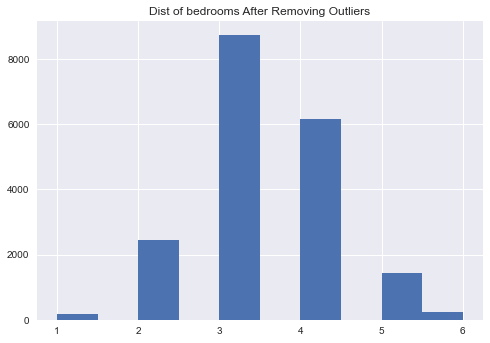

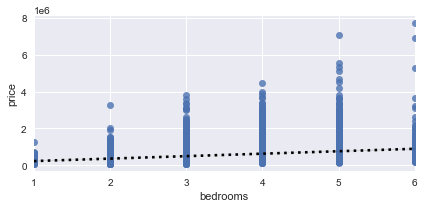

In [116]:
# the distribution is still skewed right
# the bedroom cutoff should be anything after 6
bed_cutoff = 6
no_bed_outs = df[df['bedrooms']<=bed_cutoff]
plt.title('Dist of bedrooms After Removing Outliers')
no_bed_outs['bedrooms'].hist()
plt.show();
sns.lmplot(x = 'bedrooms', y = 'price', data=no_bed_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Square Feet of Home

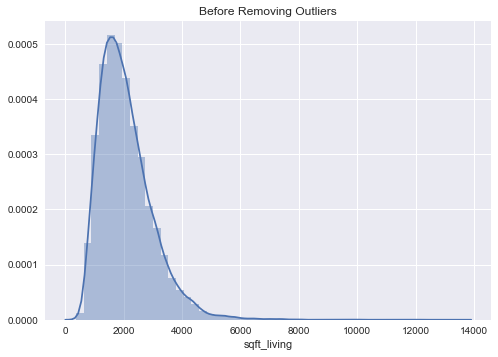

In [117]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['sqft_living'])
plt.show();

In [118]:
# data is skewed right
living_cutoff = df['sqft_living'].quantile(.975)
living_cutoff

4280.0

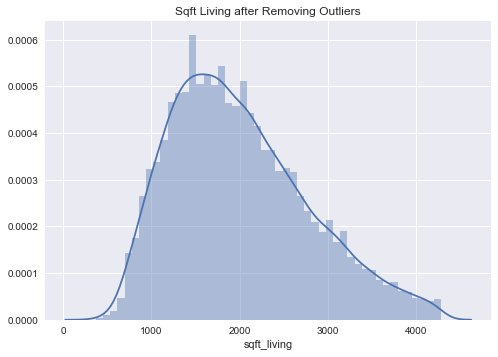

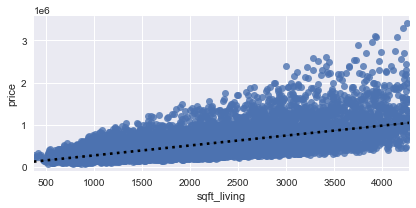

In [119]:
living_outs = df[df['sqft_living']<=living_cutoff]
plt.title('Sqft Living after Removing Outliers')
sns.distplot(living_outs['sqft_living'])
plt.show();
sns.lmplot(x = 'sqft_living', y = 'price', data=living_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

In [120]:
living_outs['sqft_living'].describe()

count    18745.000000
mean      2004.716618
std        775.247278
min        370.000000
25%       1410.000000
50%       1890.000000
75%       2500.000000
max       4280.000000
Name: sqft_living, dtype: float64

### Square Feet of Neighbors' Homes

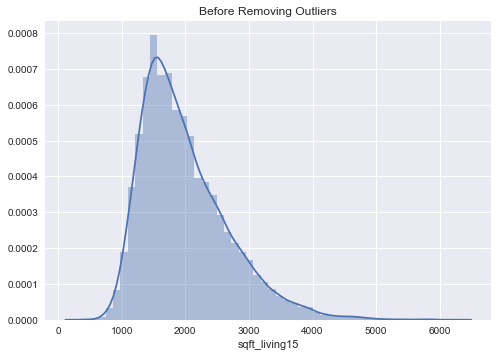

In [121]:
# Identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['sqft_living15'])
plt.show();

In [122]:
# data is skewed right
neighbors_cutoff = df['sqft_living15'].quantile(.985)
neighbors_cutoff

3907.0000000000073

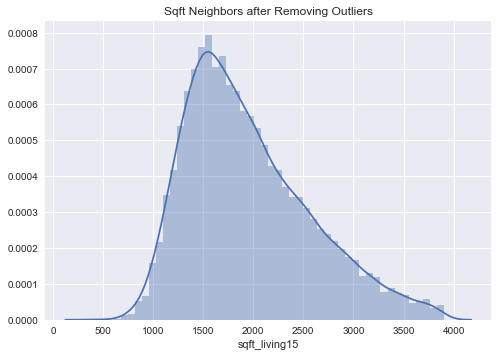

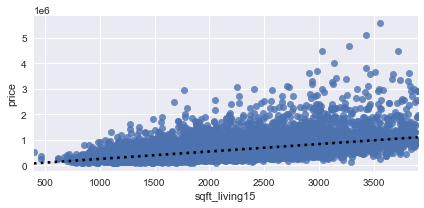

In [123]:
neighbors_outs = df[df['sqft_living15']<=neighbors_cutoff]
plt.title('Sqft Neighbors after Removing Outliers')
sns.distplot(neighbors_outs['sqft_living15'])
plt.show();
sns.lmplot(x = 'sqft_living15', y = 'price', data=neighbors_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Square Feet of Lot

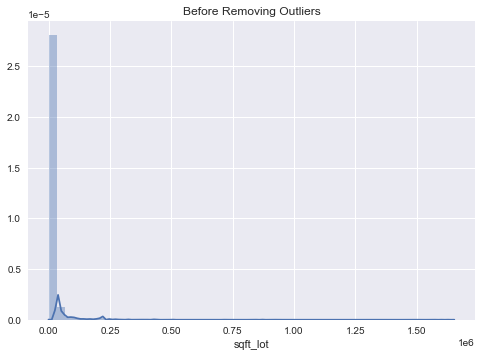

In [124]:
# Identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['sqft_lot'])
plt.show();

In [125]:
df['sqft_lot'].describe()

count    1.922100e+04
mean     1.507376e+04
std      4.081729e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.620000e+03
75%      1.071600e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [126]:
# data is skewed right
lot_cutoff = df['sqft_lot'].quantile(.85)
lot_cutoff

15084.0

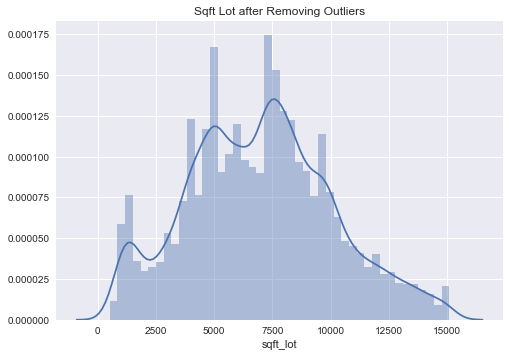

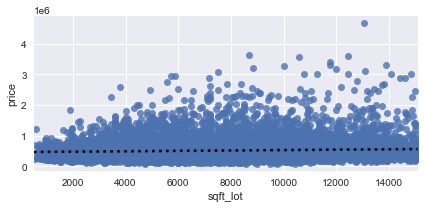

In [127]:
lot_outs = df[df['sqft_lot']<=lot_cutoff]
plt.title('Sqft Lot after Removing Outliers')
sns.distplot(lot_outs['sqft_lot'])
plt.show();
sns.lmplot(x = 'sqft_lot', y = 'price', data=lot_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Square Feet of Neighbors' Lots

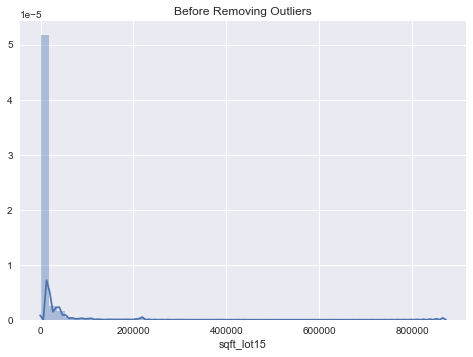

In [128]:
# Identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['sqft_lot15'])
plt.show();

In [129]:
df['sqft_lot15'].describe()

count     19221.000000
mean      12806.692108
std       27576.842373
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10092.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

In [130]:
# data is skewed right by a small amount
lot15_cutoff = df['sqft_lot15'].quantile(.85)
lot15_cutoff

13095.0

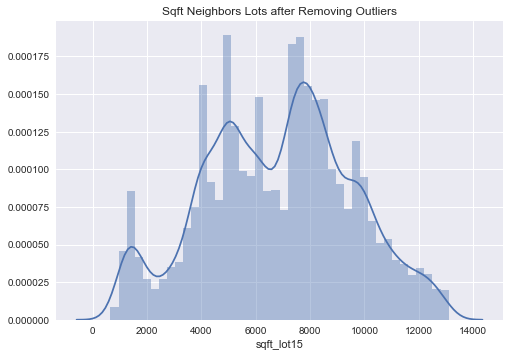

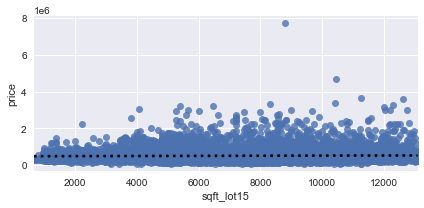

In [131]:
lot15_outs = df[df['sqft_lot15']<=lot15_cutoff]
plt.title('Sqft Neighbors Lots after Removing Outliers')
sns.distplot(lot15_outs['sqft_lot15'])
plt.show();
sns.lmplot(x = 'sqft_lot15', y = 'price', data=lot15_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();



### Year Built

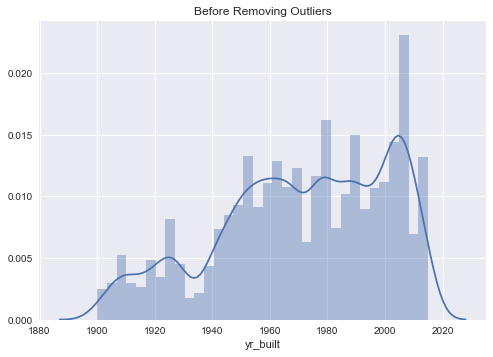

In [132]:
# Identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['yr_built'])
plt.show();

In [133]:
# data is skewed left by
built_cutoff = df['yr_built'].quantile(.075)
built_cutoff

1921.0

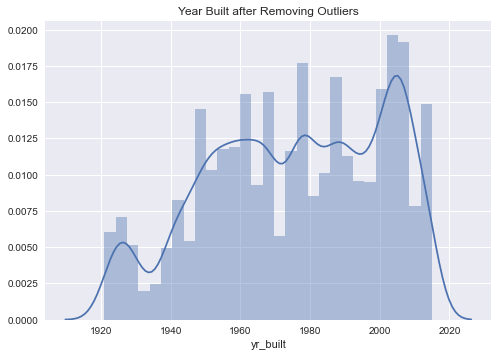

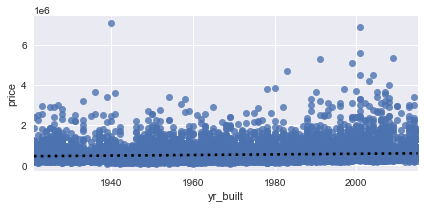

In [134]:
built_outs = df[df['yr_built']>=built_cutoff]
plt.title('Year Built after Removing Outliers')
sns.distplot(built_outs['yr_built'])
plt.show();
sns.lmplot(x = 'yr_built', y = 'price', data=built_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Year Renovated

C:\Users\daveb\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


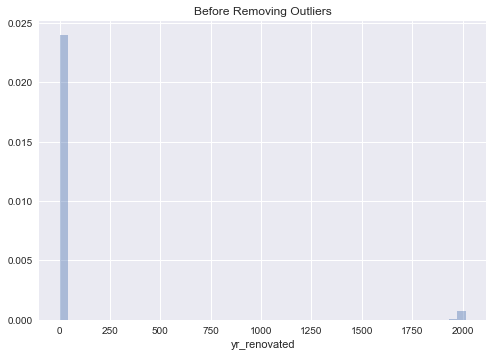

In [135]:
# Identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['yr_renovated'])
plt.show();

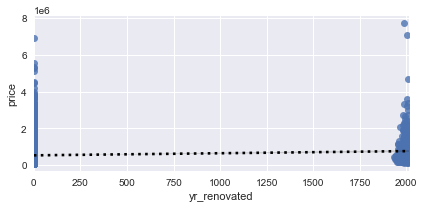

In [136]:
# no outliers
# data is either no (0.0) or in the 1900s-200s
sns.lmplot(x = 'yr_renovated', y = 'price', data=df,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Waterfront View

C:\Users\daveb\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


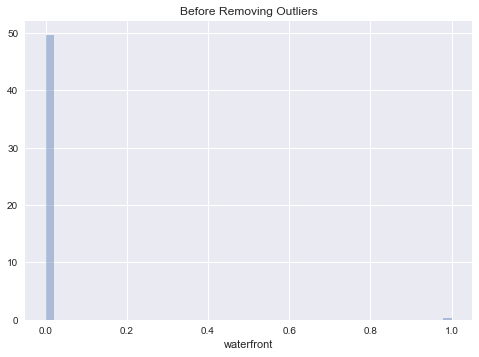

In [137]:
# Identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['waterfront'])
plt.show();

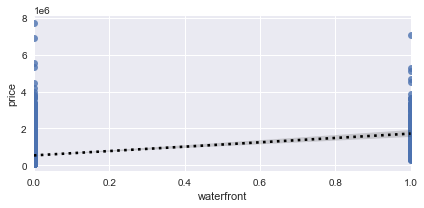

In [138]:
# no outliers
# data is either yes (1.0) or no (0.0)
# check for linear relationship with price
sns.lmplot(x = 'waterfront', y = 'price', data=df,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Floor

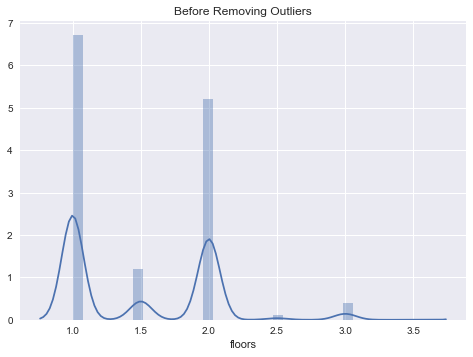

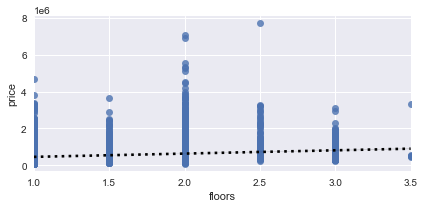

In [139]:
plt.title('Before Removing Outliers')
sns.distplot(df['floors'])
plt.show();
sns.lmplot(x = 'floors', y = 'price', data=df,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Square Feet Above

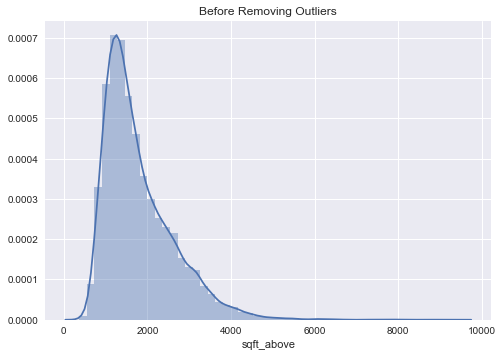

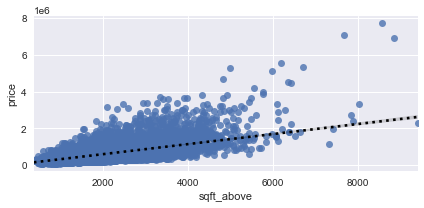

In [140]:
plt.title('Before Removing Outliers')
sns.distplot(df['sqft_above'])
plt.show();
sns.lmplot(x = 'sqft_above', y = 'price', data=df,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

In [141]:
above_cutoff = df['sqft_above'].quantile(.99)
above_cutoff

4390.0

In [142]:
(df[df['sqft_above']>above_cutoff]['sqft_above']
 .describe())

count     192.000000
mean     5141.895833
std       878.000018
min      4400.000000
25%      4570.000000
50%      4840.000000
75%      5400.750000
max      9410.000000
Name: sqft_above, dtype: float64

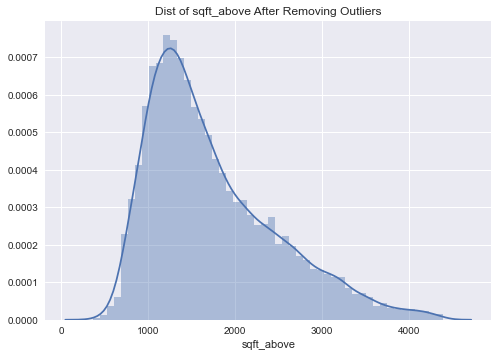

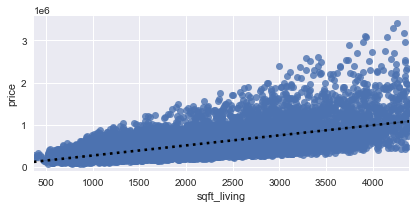

In [143]:
above_outs = df[df['sqft_living']<=above_cutoff]
plt.title('Dist of sqft_above After Removing Outliers')
sns.distplot(above_outs['sqft_above'])
plt.show();
sns.lmplot(x = 'sqft_living', y = 'price', data=above_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Squre Feet Below

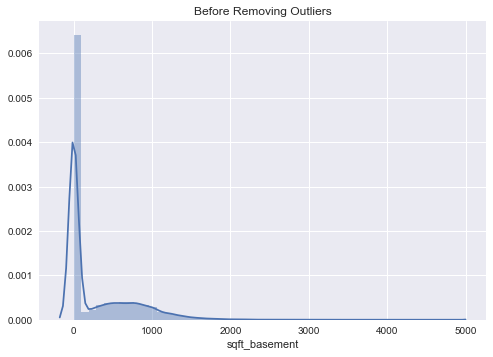

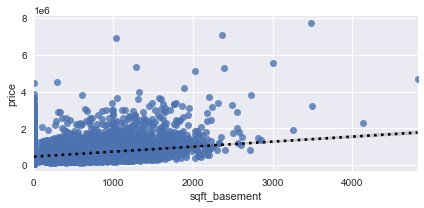

In [144]:
plt.title('Before Removing Outliers')
sns.distplot(df['sqft_basement'])
plt.show();
sns.lmplot(x = 'sqft_basement', y = 'price', data=df,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### View

C:\Users\daveb\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


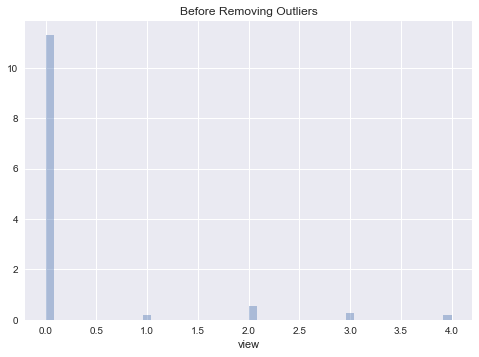

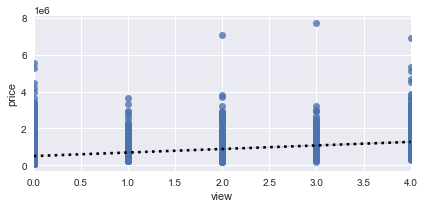

In [145]:
plt.title('Before Removing Outliers')
sns.distplot(df['view'])
plt.show();
sns.lmplot(x = 'view', y = 'price', data=df,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Latitutde

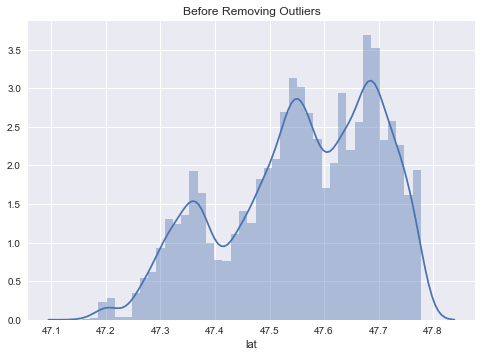

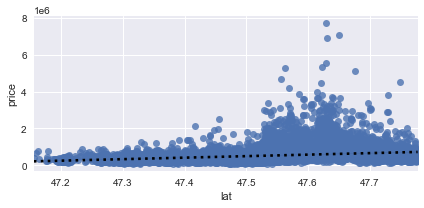

In [146]:
plt.title('Before Removing Outliers')
sns.distplot(df['lat'])
plt.show();
sns.lmplot(x = 'lat', y = 'price', data=df,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Longitute

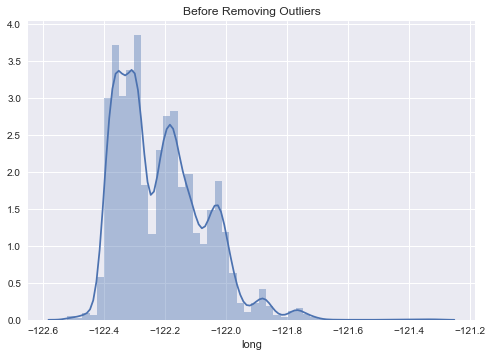

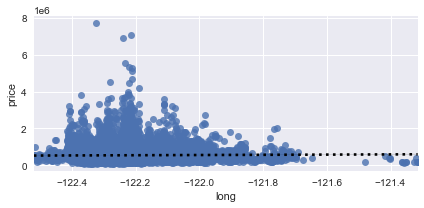

In [147]:
plt.title('Before Removing Outliers')
sns.distplot(df['long'])
plt.show();
sns.lmplot(x = 'long', y = 'price', data=df,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

# Create New Dataset

In [148]:
# drop outliers of updated columns
df = df[df['price'] < price_cutoff]
df = df[df['bathrooms'] <= bath_cutoff]
df = df[df['bedrooms'] <= bed_cutoff]
df = df[df['sqft_living'] <= living_cutoff]
df = df[df['sqft_living15'] <= neighbors_cutoff]

In [149]:
# drop data that is no longer needed
df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,17547.000000,17547.000000,17547.000000,17547.000000,1.754700e+04,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000
mean,460189.341768,3.295378,2.015387,1920.989400,1.414237e+04,1.464609,0.002508,0.151194,3.405596,7.474839,1666.420414,249.077791,1970.634980,57.993218,1888.354875,12193.753690
std,188823.087497,0.847484,0.674776,709.673746,3.799311e+04,0.536379,0.050014,0.598541,0.644858,0.985118,680.830924,388.759009,29.066785,335.209528,573.508536,25501.472704
min,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,310000.000000,3.000000,1.500000,1380.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.000000,1951.000000,0.000000,1460.000000,5025.500000
50%,430000.000000,3.000000,2.000000,1830.000000,7.482000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,0.000000,1974.000000,0.000000,1780.000000,7503.000000
75%,580092.500000,4.000000,2.500000,2380.000000,1.018250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2040.000000,480.000000,1996.000000,0.000000,2240.000000,9780.000000
max,974350.000000,6.000000,4.250000,4280.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,11.000000,4270.000000,2150.000000,2015.000000,2015.000000,3900.000000,560617.000000


In [150]:
# save new dataset
df.to_csv('data/housing_aspects.csv')